In [1]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from IPython import display
color = sns.color_palette()
%matplotlib inline 

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 16, 8

In [2]:
data = pd.read_csv('../data/data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [4]:
data.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
data[1].value_counts()

B    357
M    212
Name: 1, dtype: int64

In [6]:
target = np.where(data[1].values == 'M', 1, 0).reshape(-1, 1)
Y = np.hstack([target, 1 - target])
Y.shape

(569, 2)

In [7]:
data['target'] = np.where(data[1] == "M", 1, 0)

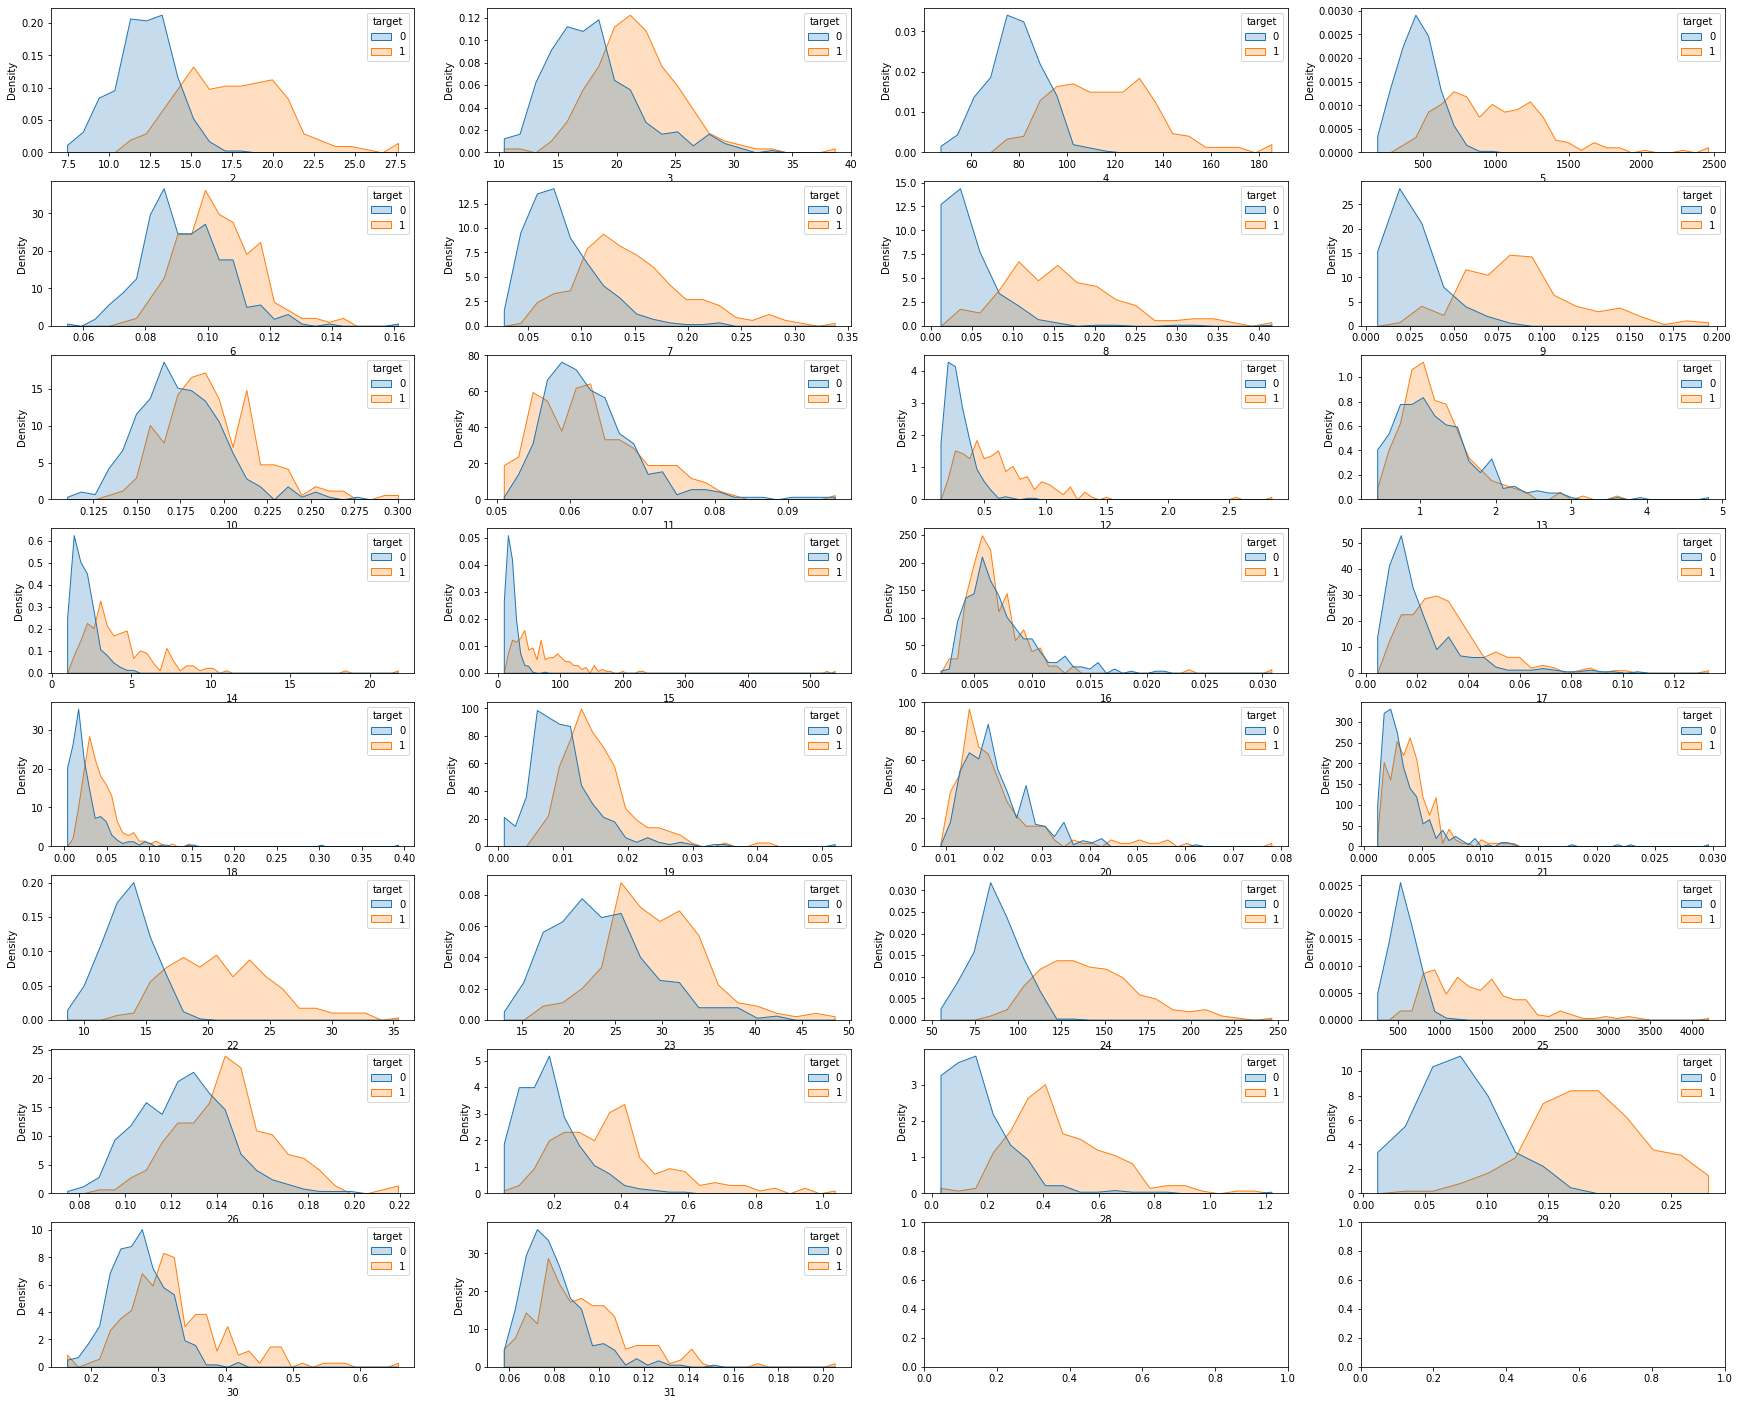

In [8]:
f, axs = plt.subplots(8, 4)
f.set_size_inches(30, 25)

for i in range(8):
    for j in range(4):
        idx = i * 4 + j
        if idx + 2 <= 31:
            sns.histplot(
                data=data[data.columns[2:]],
                x=idx + 2,
                ax=axs[i][j],
                label=f"{idx}",
                hue='target',
                stat="density",
                element="poly",
                multiple="layer",
                common_bins="True",
                common_norm=False,
            )

plt.show()

<AxesSubplot:>

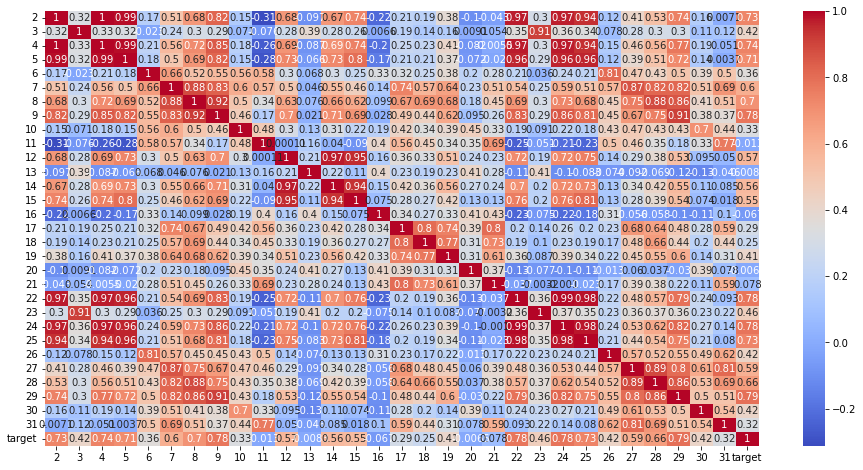

In [9]:
sns.heatmap(data[data.columns[1:]].corr(), annot = True, cmap='coolwarm')

Выводы: 4-й признак нужно исключить

### Построим прототип

In [10]:
# module net.py


class Module(object):
    """
    Модуль обрабатывает входные данные и выдает выходные.
    Он умеет делать прямой проход и обратный
    
    Basically, you can think of a module as of a something (black box) 
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`: 
        
        output = module.forward(input)
    
    The module should be able to perform a backward pass: to differentiate the `forward` function. 
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule. 
    
        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True
    
    def forward(self, input):
        """
        Вычисляет выход модуля по входным данным
        """
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Вычисляет шаг обратного распространиния ошибки
        
        Включает в себя:
          - вычисление градиента относительно 'input' (нужен для дальнейшего обратного распространения),
          - вычисление градиента относительно параметры (для обновления параметров при оптимизации).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput
    

    def updateOutput(self, input):
        """
        Вычисляет вывод, используя текущий набор параметров класса и ввода.
        """ 
        # self.output = input 
        # return self.output
        
        pass

    def updateGradInput(self, input, gradOutput):
        """
        Вычисление градиента.
        Так же обновляется соответствующая переменная 'gradInput'
        """
        # self.gradInput = gradOutput 
        # return self.gradInput
        
        pass   
    
    def accGradParameters(self, input, gradOutput):
        """
        Вычисление градиента относительно его собственных параметров.
        Не переопределяет, если модуль не имеет параметров.
        """
        pass
    
    def zeroGradParameters(self): 
        """
        Обнуляет переменную 'gradParams', если модуль имеет параметры.
        """
        pass
        
    def getParameters(self):
        """
        Возвращает список с его параметрами.
        Если у модуля нет параметров, вернет пустой список.
        """
        return []
        
    def getGradParameters(self):
        """
        Возвращает список с градиентами относительно его параметров.
        Если у модуля нет параметров, вернет пустой список.
        """
        return []
    
    def train(self):
        """
        Устанавливает режим обучения для модуля.
        Поведение обучения и тестирования отличается для Dropout, BatchNorm.
        """
        self.training = True
    
    def evaluate(self):
        """
        Устанавливает режим оценки для модуля.
        Поведение обучения и тестирования отличается для Dropout, BatchNorm.
        """
        self.training = False
    
    def __repr__(self):
        """
        Удобочитаемое описание.
        """
        return "Module"

    
class Sequential(Module):
    """
        Этот класс реализует контейнер, который последовательно обрабатывает входные данные.
        'input' обрабатывается каждым модулем (слоем) в self.modules последовательно.
    """
    
    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        """
        Добовляет модуль в контейнер.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Базовый прямой проход.
        """
        self.output = input
        for module in self.modules:
            self.output = module.forward(self.output)
            
        return self.output

    def backward(self, input, gradOutput):
        """
        Базовый обратный проход.
            
            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)   
            gradInput = module[0].backward(input, g_1)   
        """
        for i in range(len(self.modules) - 1, 0, -1):
            gradOutput = self.modules[i].backward(self.modules[i - 1].output, gradOutput)
        self.gradInput = self.modules[0].backward(input, gradOutput)
        
        return self.gradInput
      

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()
    
    def getParameters(self):
        """
        Собирает все параметры в список.
        """
        return [x.getParameters() for x in self.modules]
    
    def getGradParameters(self):
        """
        Собирает все градиенты по параметрам в список.
        """
        return [x.getGradParameters() for x in self.modules]
    
    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)
    
    def train(self):
        """
        Распространяет параметр обучения по всем модулям
        """
        self.training = True
        for module in self.modules:
            module.train()
    
    def evaluate(self):
        """
        Распространяет параметр оценка по всем модулям
        """
        self.training = False
        for module in self.modules:
            module.evaluate()
            

class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None
        
    def forward(self, input, target):
        """
        Вычисляет функцию потерь, связанную с критерием.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
        Вычисляет градиенты функции потерь, связанной с критерием.
        """
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        """
        Функция, которую нужно переопределить.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Функция, которую нужно переопределить.
        """
        return self.gradInput   

    def __repr__(self):
        """
        Удобочитаемое описание.
        """
        return "Criterion"
    
    
class Linear(Module):
    """
    Модуль (полносвязный слой), выполняющий линейное преобразование.
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()
        
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)
        
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        self.output = input @ self.W.T + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput @ self.W
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        self.gradW = np.dot(gradOutput.T, input)
        self.gradb = np.sum(gradOutput, axis=0)
        
        
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' %(s[1],s[0])
        return q
    
    
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()
    
    def updateOutput(self, input):
        # нормализация
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))
        
        self.output = np.exp(self.output)
        self.output = self.output / np.sum(self.output, axis=1, keepdims=True)
        
        return self.output
    
    def updateGradInput(self, _input, gradOutput):
        return self.gradInput
    
    def __repr__(self):
        return "SoftMax"
    
    
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()
    
    def updateOutput(self, input):
        # нормализация
        self.output = np.subtract(input, input.max(axis=1, keepdims=True))

        self.output -= np.log(np.sum(np.exp(self.output), axis = 1, keepdims=True))
        
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        new_grad_output = gradOutput / np.exp(self.output)
        conv = np.sum( np.exp(self.output) * new_grad_output, axis=1, keepdims=True)
        self.gradInput = np.exp(self.output) * (new_grad_output - conv)
        
        return self.gradInput
    
    def __repr__(self):
        return "LogSoftMax"
    
    
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def updateOutput(self, _input):
        self.output = np.maximum(_input, 0)
        return self.output
    
    def updateGradInput(self, _input, gradOutput):
        self.gradInput = np.multiply(gradOutput , _input > 0)
        return self.gradInput
    
    def __repr__(self):
        return "ReLU"
    
    
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()
            
        self.slope = slope
        
    def updateOutput(self, input):
        self.output = np.zeros_like(input)
        self.output[input >= 0] = input[input >= 0]
        self.output[input < 0] = input[input < 0] * self.slope
        
        return  self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput , input > 0) + np.multiply(gradOutput , input <= 0) * self.slope
        
        return self.gradInput
    
    def __repr__(self):
        return "LeakyReLU"
    
    
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()
        
        self.p = p
        self.mask = None
        
    def updateOutput(self, input):
        if self.training:
            self.mask = np.random.choice([True, False], size=input.shape, p=[1 - self.p, self.p])
            self.output = np.copy(input)
            self.output[~self.mask] = 0.
            np.divide(self.output, (1. - self.p), out=self.output)
        else:
            self.output = input
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        grad = np.ones(input.shape)
        grad[~self.mask] = 0
        self.gradInput = gradOutput * grad / (1. - self.p)
        return self.gradInput
        
    def __repr__(self):
        return "Dropout"
    
    
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = None 
        self.moving_variance = None
        
    def updateOutput(self, input):
        if self.moving_mean is None:
            self.moving_mean = 0
        if self.moving_variance is None:
            self.moving_variance = 0
            
        if self.training:
            b_mean = np.mean(input, axis=0, keepdims = True)
            b_var = np.var(input, axis=0, keepdims = True)
            self.output = (input - b_mean) / np.sqrt(b_var + self.EPS)
            self.moving_mean = self.moving_mean * self.alpha + b_mean * (1 - self.alpha)
            self.moving_variance = self.moving_variance * self.alpha + b_var * (1 - self.alpha)
        else:
            self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        var_sqrt = np.sqrt(np.var(input, axis=0, keepdims = True) + self.EPS)
        m = np.mean(gradOutput * self.output, axis=0, keepdims = True)
        self.gradInput = (gradOutput  - self.output * m - gradOutput.mean(axis=0)) / var_sqrt
        return self.gradInput
    
    def __repr__(self):
        return "BatchNormalization"
    
    
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target): 
        self.output = -np.sum(target * input) / input.shape[0]
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput = -target / input.shape[0]
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"
    

def simple_sgd(variables, gradients, config, state): 
    # Простая структура для храниния накапливаемых значений градиентов
    state.setdefault('accumulated_grads', {})
    
    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            
            current_var -= config['learning_rate'] * current_grad
            var_index += 1   


def adam_optimizer(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('m', {})  # first moment vars
    state.setdefault('v', {})  # second moment vars
    state.setdefault('t', 0)   # timestamp
    state['t'] += 1
    for k in ['learning_rate', 'beta1', 'beta2', 'epsilon']:
        assert k in config, config.keys()
    
    var_index = 0 
    lr_t = config['learning_rate'] * np.sqrt(1 - config['beta2']**state['t']) / (1 - config['beta1']**state['t'])
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            var_first_moment = state['m'].setdefault(var_index, np.zeros_like(current_grad))
            var_second_moment = state['v'].setdefault(var_index, np.zeros_like(current_grad))
            
            # update `current_var_first_moment`, `var_second_moment` and `current_var` values
            #np.add(... , out=var_first_moment)
            #np.add(... , out=var_second_moment)
            #current_var -= ...
            np.add(config['beta1'] * var_first_moment,
                   (1 - config['beta1']) * current_grad, 
                   out=var_first_moment)
            np.add(config['beta2'] * var_second_moment,
                   (1 - config['beta2']) * current_grad ** 2,
                   out=var_second_moment)
            np.subtract(
                current_var,
                lr_t * var_first_moment / (np.sqrt(var_second_moment) + config['epsilon']),
                out=current_var
            )
            # small checks that you've updated the state; use np.add for rewriting np.arrays values
            assert var_first_moment is state['m'].get(var_index)
            assert var_second_moment is state['v'].get(var_index)
            var_index += 1


def get_batches(dataset, batch_size):
    # batch generator
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]
        
        
def get_model(n_in, n_out, n_sine=4):
    net = Sequential()
    net.add(Linear(n_in, n_in * n_sine))
    net.add(BatchNormalization())
    net.add(Dropout(0.3))
    net.add(ReLU())
    net.add(Linear(n_in * n_sine, n_in * n_sine))
    net.add(BatchNormalization())
    net.add(Dropout(0.2))
    net.add(ReLU())
    net.add(Linear(n_in * n_sine, n_out))
    net.add(BatchNormalization())
    net.add(Dropout(0.1))
    net.add(LogSoftMax())
    
    return net

In [11]:
PATH_TMP = 'tmp/'

In [12]:
# module data_preparation

import pandas as pd
import numpy as np


def train_test_split(X, test_size=0.3, random_state=42):
    np.random.seed(seed=random_state)
    indx = np.random.permutation(len(X))
    threshold = int(test_size * len(X))
    indx_train, indx_test = indx[threshold:], indx[:threshold]
    
    return X.iloc[indx_train], X.iloc[indx_test]


def split_data_on_x_y(frame, name):
    target = np.where(frame[1].values == 'M', 1, 0).reshape(-1, 1)
    Y = np.hstack([target, 1 - target])
    feature = frame.columns[2:]

    frame[feature].to_csv(PATH_TMP + f'{name}.csv', index=False)
    pd.DataFrame(Y).to_csv(PATH_TMP + f'{name}_target.csv', index=False)
    
    
def main():
    data = pd.read_csv('../data/data.csv', names=range(32))

    train, test = train_test_split(data)
    split_data_on_x_y(train, 'train')     
    split_data_on_x_y(test, 'test')
    
    
if __name__ == '__main__':
    main()

In [13]:
# module config

OPTIMIZER_CONFIG = {'learning_rate' : 1e-1}
OPTIMIZER_ADAM_CONFIG = {'learning_rate': 0.05, 'beta1': 0.9, 'beta2':0.95, 'epsilon':1e-7}

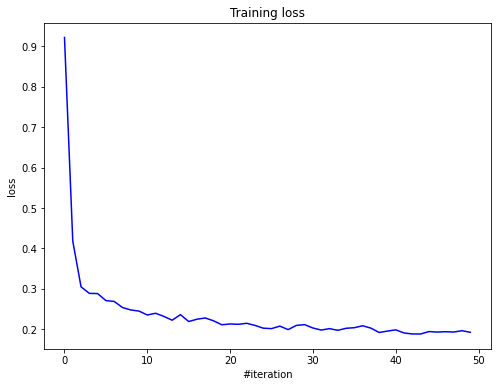

2022-11-09 22:26:26,182	INFO	Current loss: 0.192735


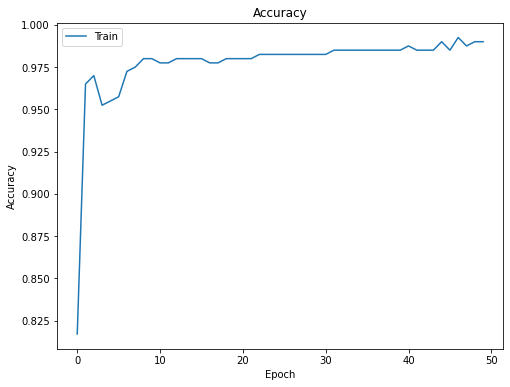

2022-11-09 22:26:26,276	INFO	Accuracy train: 0.989975


In [14]:
# module predict

import pandas as pd
import numpy as np

import pickle
import logging
import logging.config

from IPython import display
import matplotlib.pyplot as plt

# from config import OPTIMIZER_CONFIG, OPTIMIZER_ADAM_CONFIG


log_conf = {
    "version": 1,
    "formatters": {
        "simple": {
            "format": "%(asctime)s\t%(levelname)s\t%(message)s",
        },
    },
    "handlers": {
        "file_handler": {
            "class": "logging.FileHandler",
            "level": "DEBUG",
            "filename": f"{PATH_TMP}file_handler.log",
            "formatter": "simple",
            },
        "stream_handler": {
            "level": "DEBUG",
            "formatter": "simple",
            "class": "logging.StreamHandler",
        },
    },
    "loggers": {
        "": {
            "level": "INFO",
            "handlers": ["file_handler", "stream_handler"],
        },
    },
}


class Model:
    def __init__(self, frame, optim='sgd'):
        self.optim = optim
        self.mean = frame.values.mean(axis=0)
        self.std = frame.values.std(axis=0)
        self.n_in = len(frame.columns)
        self.model = get_model(self.n_in, 2, 3)
    
    def std_scaler(self, x):
        return (x - self.mean) / self.std
        
    def train(self, X, y, n_epoch=50, batch_size=1000):
        criterion = ClassNLLCriterion()
        optimizer_state = {}

        loss_history = []
        accuracy_train = []

        for i in range(n_epoch):
            for x_batch, y_batch in get_batches((X, y), batch_size):
                self.model.train()
                self.model.zeroGradParameters()
                
                # Forward
                predictions = self.predict_proba(x_batch)
                loss = criterion.forward(predictions, y_batch)
                if np.isnan(loss):
                    break
                
                # Backward
                dp = criterion.backward(predictions, y_batch)
                self.model.backward(x_batch, dp)

                # Update weights
                if self.optim == 'sgd':
                    simple_sgd(
                        self.model.getParameters(),
                        self.model.getGradParameters(),
                        OPTIMIZER_CONFIG,
                        optimizer_state,
                )
                if self.optim == 'adam':
                    adam_optimizer(self.model.getParameters(),
                                   self.model.getGradParameters(),
                                   OPTIMIZER_ADAM_CONFIG,
                                   optimizer_state)

                loss_history.append(loss)

            if np.isnan(loss):
                break

            self.model.evaluate()
            y_train_eval = y[:, :1].reshape(-1)
            y_pred = self.predict_proba(X).argmin(axis=-1)
            accuracy_train.append(self.evaluate(y_pred, y_train_eval))

            # Visualize
            display.clear_output(wait=True)
            plt.figure(figsize=(8, 6))

            plt.title("Training loss")
            plt.xlabel("#iteration")
            plt.ylabel("loss")
            plt.plot(loss_history, "b")
            plt.show()

            logger.info(f"Current loss: {loss:.6f}")

        plt.figure(figsize=(8, 6))

        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.plot(accuracy_train, label='Train')
        plt.legend(loc='best')
        plt.show()

        logger.info(f'Accuracy train: {accuracy_train[-1]:.6f}')
        
    def evaluate(self, y_pred, y_true):
        return np.mean(y_pred == y_true)
        
    def fit(self, frame, y):
        X = self.std_scaler(frame)
        self.train(X.values, y.values)
    
    def predict_proba(self, X):
        return self.model.forward(X)
    
    def predict(self, frame):
        X = self.std_scaler(frame)
        return self.predict_proba(X.values).argmin(axis=-1)
    

def main():    
    train = pd.read_csv(PATH_TMP + 'train.csv')
    train_target = pd.read_csv(PATH_TMP + 'train_target.csv')

    del train['4']

    model = Model(train, 'adam')
    model.fit(train, train_target)

    with open(PATH_TMP + 'model.pickle', 'wb') as f:
        pickle.dump(model, f)


if __name__ == '__main__':
    logging.config.dictConfig(log_conf)
    logger = logging.getLogger()
    main()

In [15]:
# module predict

import pickle
import pandas as pd


def main():
    try:
        with open(PATH_TMP + 'model.pickle', 'rb') as f:
            model = pickle.load(f)
    except Exception as error:
        print(error)

    test = pd.read_csv(PATH_TMP + 'test.csv')
    del test['4']
    predict = model.predict(test)
    pd.Series(predict).to_csv(PATH_TMP + 'predict_target.csv', index=False)

    
if __name__ == '__main__':
    main()

In [16]:
# module evaluate

import pandas as pd
import numpy as np


def main():
    test_target = pd.read_csv(PATH_TMP + 'test_target.csv')
    test_target = test_target.values[:, :1].flatten()

    predict_target = pd.read_csv(PATH_TMP + 'predict_target.csv')
    predict_target = predict_target.values.flatten()

    score = np.mean(predict_target == test_target)
    print(f'Accuracy: {score:.6f}')
    

if __name__ == '__main__':
    main()

Accuracy: 0.982353
